✍ Должно быть, вы уже заметили, что визуализация — очень полезный инструмент для отслеживания проблем в процессе обучения.

Например, может быть полезно построить график ошибки на тренировочной и валидационной выборках в зависимости от какого-то параметра модели. Если график ошибки на валидации становится выше, чем график ошибки на обучении, то можно сказать, что модель переобучилась.

Ниже приведён пример такого графика для градиентного бустинга (один из видов ансамблевых моделей) из 500 деревьев решений. На графике показано, как меняется функция ошибки (logloss) в зависимости от количества добавленных в ансамбль деревьев. Видно, что примерно на 150-й итерации ошибка на валидационной выборке начинает увеличиваться, а вот на тренировочной выборке продолжает падать.

img

Такая кривая называется валидационной кривой (validation curve), и она позволяет увидеть, как изменяется метрика в зависимости от значения внешнего параметра.

О построении такой кривой мы поговорим, когда будем обсуждать подбор внешних параметров модели, но вы можете найти эту информацию в документации.

В этом модуле мы поговорим о других графиках, называемых кривыми обучения (learning curve). Они позволяют легко определять наличие переобучения и недообучения, визуально сравнивать модели между собой и увидеть, как качество модели зависит от добавления новых данных.

ИДЕЯ КРИВОЙ ОБУЧЕНИЯ

Давайте последовательно придём к тому, что такое кривая обучения и как она строится.

Представим, что мы решаем некоторую задачу регрессии. У нас есть некоторый абстрактный набор данных, состоящий из 100 наблюдений. В нём есть два столбца: x — фактор и y — целевой признак.

Мы разделяем данные на тренировочный и валидационный наборы в соотношении 80/20.

Возьмём одно наблюдение из обучающего набора данных и построим некоторую модель, например линейную регрессию. Затем измеряем метрику, например, MSE, в проверочном наборе и в этом единственном обучающем экземпляре. Ошибка в обучающем объекте будет равна 0, так как довольно легко идеально подогнать прямую под одну точку. Однако ошибка в проверочном наборе будет очень большой.

img

Теперь давайте построим ту же самую модель на десяти наблюдениях из обучающего набора данных. Так как мы используем больше наблюдений для обучения, то ошибка на тренировочной выборке увеличится, а на валидационной — упадёт.

img

Будем продолжать процедуру, подавая на вход модели всё больше данных из обучающего набора, но не меняя валидационный набор.

В пределе мы будем использовать весь обучающий набор данных для обучения. Ошибки на каждом из наборов данных вновь изменятся в большую или меньшую сторону.

img

Наконец, если мы построим график эволюции метрики, по которой измеряем качество модели, по мере добавления всё новых и новых данных, мы получим примерно следующие кривые:

img

Построенные кривые и называются кривыми обучения. Теперь мы можем дать формальное определение этому термину.

Кривая обучения (learning curve) — это график зависимости некоторой метрики на обучающем (валидационном) наборе данных от количества объектов, которые участвуют в обучении модели.

Аналогично строятся кривые обучения для задачи классификации. В этом случае вместо метрик регрессии используются метрики классификации. Идея и принцип построения остаются теми же.

Что нам дают такие кривые?

1
Основное назначение кривых обучения — мониторинг изменения метрики в процессе поступления новых данных. Благодаря этому мы можем найти такой размер данных, начиная с которого обогащение набора данных новыми наблюдениями не приносит значительного эффекта.

Например, ниже изображены тренировочная и валидационная кривые обучения на некотором наборе данных. В качестве модели используется линейная регрессия. Из графика видно, что метрики на тренировочной и валидационной выборках практически равны друг другу уже при 2000 объектов в обучающем наборе. Дальнейшее увеличение количества объектов не приводит к существенным изменениям.

img

2
Благодаря кривым обучения мы можем отслеживать недообучение и переобучение модели.

Ниже представлено три пары тренировочных и валидационных кривых обучения, а также желаемое значение метрики accuracy.

Первые два графика демонстрируют, как будут выглядеть кривые обучения при наличии недообучения (высокий bias) и переобучения (высокий variance). Видно, что в случае недообучения ни одна из кривых попросту не может достичь целевой отметки, а в случае переобучения тренировочная и валидационная кривые находятся на большом расстоянии друг от друга.

Идеальный вариант кривой обучения показан на третьем графике: кривые равномерно приближаются к целевой отметке. В таком случае можно говорить об отсутствии недообучения и переобучения.

img

3
Кривые обучения позволяют визуально сравнить качество различных моделей.

Ниже представлены три различные модели, решающие одну и ту же задачу классификации: логистическая регрессия (Logistic Regression), дерево решений (Decision Tree) и метод опорных векторов (Support Vector Machine). Для каждой модели построены пары кривых обучения. Также для каждого случая приведена разделяющая поверхность, которая классифицирует точки на синие и красные.

img
Источник изображения
Из кривой обучения для логистической регрессии видно, что данная модель является недообученной (кривые сходятся к низкому значению метрики).

Из кривой обучения для метода опорных векторов можно сделать вывод, что модель является переобученной, так как тренировочная и валидационная кривые находятся далеко друг от друга.

Наилучшей из представленных в данной задаче является модель дерева решений, что доказывают кривые обучения, построенные для данной модели: тренировочная и валидационная кривые сходятся друг к другу и достигают приемлемого качества.

На практике для наиболее эффективного построения кривых обучения используется кросс-валидация. То есть каждый набор обучающих данных, участвующих в построении кривой обучения, дополнительно проходит через k-fold-разбиение и вычисление метрик на  фолдах.

В результате для тренировочных и валидационных фолдов у нас получается по таблице из метрик размером , где  — количество точек на оси абсцисс (x), по которым строятся кривые обучения, а  — количество фолдов. Для построения кривой рассчитываются средние значения по столбцам таблицы, они и будут откладываться по оси ординат (y) при построении кривой.

ПОСТРОЕНИЕ КРИВОЙ ОБУЧЕНИЯ

Давайте научимся строить кривые обучения с помощью Python. 

Для вычисления точек для построения кривых обучения в модуле model_selection библиотеки sklearn есть функция learning_curve().

Основные параметры функции learning_curve():

estimator — модель, качество которой будет проверяться на кросс-валидации.
X — матрица наблюдений.
y — вектор-столбец правильных ответов.
train_sizes — относительное (долевое) или абсолютное количество обучающих примеров, которые будут использоваться для создания кривой обучения. Если dtype имеет значение float, он рассматривается как часть максимального размера обучающего набора (который определяется выбранным методом проверки), т. е. он должен быть в пределах (0, 1].
По умолчанию используется список [0.1, 0.325, 0.55, 0.775, 1.0], то есть для построения кривой обучения используется пять точек. Первая точка кривой обучения строится по 10 % наблюдений из обучающего набора, вторая точка — по 32.5 % и так далее до тех пор, пока в построении модели не будет участвовать весь обучающий набор данных.
cv — кросс-валидатор из библиотеки sklearn (например, KFold) или количество фолдов, на которые необходимо разбить выборку. По умолчанию используется кросс-валидация k-fold на пяти фолдах.
scoring — название метрики в виде строки либо функция для её вычисления.
Если передать функции все необходимые параметры, она вернёт три массива:

Список из размеров тренировочного набора (ось абсцисс кривой обучения).
Матрица из метрик, полученных при разных размерах тренировочного набора во время кросс-валидации на тренировочных фолдах. В строках этой таблицы указаны списки метрик, соответствующие каждому размеру тренировочного набора данных, а внутри списков находятся сами метрики на кросс-валидации.
Матрица из метрик, полученных при разных размерах тренировочного набора во время кросс-валидации на валидационных фолдах.
Код для вычисления координат будет иметь следующий вид:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import model_selection
from sklearn import tree
from sklearn import linear_model
from sklearn import metrics

df = pd.read_csv('data/water_potability.csv')
#Заполняем пропуски
df['ph'] = df['ph'].fillna(df.groupby('Potability')['ph'].transform('median'))
df['Sulfate'] = df['Sulfate'].fillna(df.groupby('Potability')['Sulfate'].transform('median'))
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df.groupby('Potability')['Trihalomethanes'].transform('median'))

X = df.drop('Potability', axis=1)
y = df['Potability']

model = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_depth=7,
    min_samples_leaf=5,
    class_weight='balanced',
    random_state=42
)

skf = model_selection.StratifiedKFold(
    n_splits=5
)

train_sizes, train_scores, valid_scores = model_selection.learning_curve(
    estimator=model,
    X=X,
    y=y,
    cv=skf,
    scoring='f1'
)



Для того чтобы вычислить среднюю кросс-валидационную метрику на каждом из наборов данных, необходимо рассчитать среднее по столбцам матриц train_scores и valid_scores:

In [2]:
train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
 
print('Train k-fold f1 scores',  train_scores_mean)
print('Valid k-fold f1 scores',  valid_scores_mean)
 

Train k-fold f1 scores [0.74181818 0.84282405 0.78703798 0.75046111 0.74357833]
Valid k-fold f1 scores [0.31290946 0.54221938 0.59712148 0.6403136  0.65931273]


Теперь можно построить графики кривых обучения:



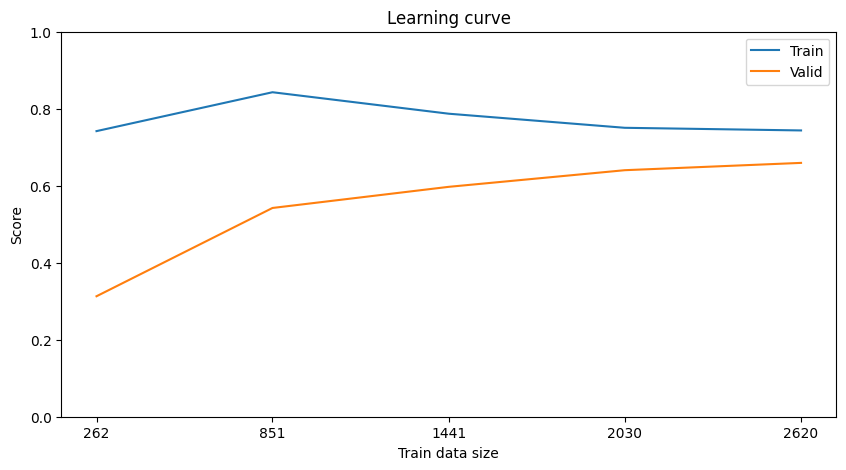

In [3]:
#Визуализируем кривую обучения
fig, ax = plt.subplots(figsize=(10, 5)) #фигура + координатная плоскость
#Строим кривую обучения по метрикам на тренировочных фолдах
ax.plot(train_sizes, train_scores_mean, label='Train')
#Строим кривую обучения по метрикам на валидационных фолдах
ax.plot(train_sizes, valid_scores_mean, label='Valid')
#Даём название графику и подписи осям
ax.set_title('Learning curve')
ax.set_xlabel('Train data size')
ax.set_ylabel('Score')
#Устанавливаем отметки по оси абсцисс
ax.xaxis.set_ticks(train_sizes)
#Устаналиваем диапазон оси ординат
ax.set_ylim(0, 1)
#Отображаем легенду
ax.legend();

Видно, что в процессе увеличения количества наблюдений в обучающем наборе данных, метрики на тренировочной и валидационной выборках постепенно приближаются друг к другу, то есть уменьшается разброс (variance).

На финальном этапе, при использовании всех 2620 наблюдений из обучающей выборки, разница в показателях между тренировочной и валидационной выборками всё ещё присутствует, однако эту разницу можно принять как случайную.

Для удобства дальнейшего использования описанных выше действий для построения кривой обучения давайте обернём их в функцию plot_learning_curve(). У функции будет несколько аргументов: модель, набор данных (X, y), кросс-валидатор, метрика, координатная плоскость matplotlib, на которой будет строиться график, и подпись графика:

In [4]:
def plot_learning_curve(model, X, y, cv, scoring="f1", ax=None, title=""):
    # Вычисляем координаты для построения кривой обучения
    train_sizes, train_scores, valid_scores = model_selection.learning_curve(
        estimator=model,  # модель
        X=X,  # матрица наблюдений X
        y=y,  # вектор ответов y
        cv=cv,  # кросс-валидатор
        scoring=scoring,  # метрика
    )
    # Вычисляем среднее значение по фолдам для каждого набора данных
    train_scores_mean = np.mean(train_scores, axis=1)
    valid_scores_mean = np.mean(valid_scores, axis=1)
    # Если координатной плоскости не было передано, создаём новую
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 4))  # фигура + координатная плоскость
    # Строим кривую обучения по метрикам на тренировочных фолдах
    ax.plot(train_sizes, train_scores_mean, label="Train")
    # Строим кривую обучения по метрикам на валидационных фолдах
    ax.plot(train_sizes, valid_scores_mean, label="Valid")
    # Даём название графику и подписи осям
    ax.set_title("Learning curve: {}".format(title))
    ax.set_xlabel("Train data size")
    ax.set_ylabel("Score")
    # Устанавливаем отметки по оси абсцисс
    ax.xaxis.set_ticks(train_sizes)
    # Устанавливаем диапазон оси ординат
    ax.set_ylim(0, 1)
    # Отображаем легенду
    ax.legend()

Примечание. Вы можете сохранить написанную нами функцию и обращаться к ней в своих задачах. Она не раз вам пригодится в исследованиях.

Теперь, когда у нас есть наша функция, давайте построим кривые обучения для нескольких моделей. Будем использовать следующие модели:

логистическую регрессию,
дерево решений с ограниченной максимальной глубиной и количеством объектов в листе,
дерево решений без ограничений.
Создадим список, в котором будем хранить эти модели:

In [5]:
#Создаём список из моделей
models = [
    linear_model.LogisticRegression(
        max_iter=1000, #количество итераций на сходимость
        random_state=42, #генератор случайных чисел
        class_weight='balanced' #веса классов
    ),
    tree.DecisionTreeClassifier(
        criterion='entropy', #критерий информативности
        max_depth=7, #максимальная глубина
        min_samples_leaf=5, #минимальное число объектов в листе
        random_state=42, #генератор случайных чисел 
        class_weight='balanced' #веса классов
    ),
    tree.DecisionTreeClassifier(
        criterion='entropy', #критерий информативности
        random_state=42, #генератор случайных чисел 
        class_weight='balanced' #веса классов
    ),
]

Наконец, построим кривые обучения для каждой из моделей. Для этого заранее создадим k-fold-кросс-валидатор со стратификацией на пять фолдов. Создадим фигуру с тремя координатными плоскостями. Реализуем цикл по составленному списку из моделей и их индексам (они нам понадобятся для отображения на соответствующих координатных плоскостях). Внутри цикла будем вызывать нашу функцию plot_learning_curve():

c:\Users\pliku\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\pliku\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

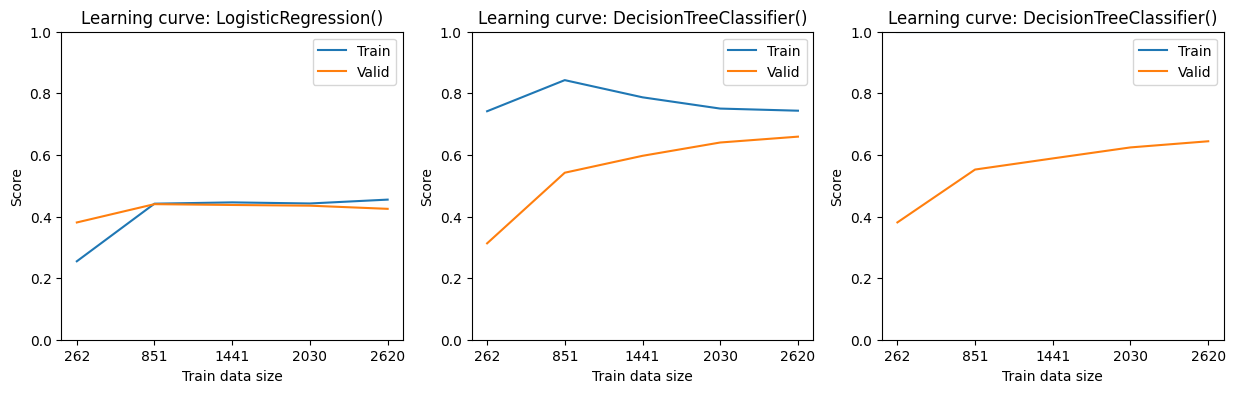

In [6]:
#Создаем объект кросс-валидатора k-fold со стратификацией
skf = model_selection.StratifiedKFold(n_splits=5)
#Визуализируем кривые обучения
fig, axes = plt.subplots(1, 3, figsize=(15, 4)) #фигура + 3 координатных плоскости
#Создаем цикл по списку моделей и индексам этого списка
for i, model in enumerate(models): #i-текущий индекс, model - текущая модель
    plot_learning_curve(
        model, X, y, 
        skf, 
        ax=axes[i], 
        title=model.__class__.__name__ + '()'
)